In [149]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load Exp Zscore Matrix
ExpZscoreMat = "../dat/allen-mouse-exp/energy-zscore-conn-model.csv"
ExpZscoreMat = pd.read_csv(ExpZscoreMat, index_col="ROW")
allen_mouse_genes = loadgenelist("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/allen-mouse-gene_entrez.txt")

In [3]:
asd_ssc = loadgenelist("../dat/genes/Jon.ssc.txt")
asd_spark = loadgenelist("../dat/genes/Jon.spark.txt")
asd_tada = loadgenelist("../dat/genes/Jon.tada.txt")
asd_sib = loadgenelist("../dat/genes/asd.sib.entrez.list")
asd_sib_lgd = loadgenelist("../dat/genes/asd.sib.lgd.list")

In [78]:
print(len(asd_ssc), len(asd_sib_lgd))

239 158


In [42]:
bias_asd_ssc = QuantileAVGScoring(ExpZscoreMat, asd_ssc,
                  csv_fil="dat/bias/asd.ssc.qavg.rank.tsv")
bias_asd_spark = QuantileAVGScoring(ExpZscoreMat, asd_spark,
                  csv_fil="dat/bias/asd.spark.qavg.rank.tsv")
bias_asd_tada = QuantileAVGScoring(ExpZscoreMat, asd_tada,
                  csv_fil="dat/bias/asd.tada.qavg.rank.tsv")
bias_asd_sib = QuantileAVGScoring(ExpZscoreMat, asd_sib,
                  csv_fil="dat/bias/asd.sib.qavg.rank.tsv")
bias_asd_sib_lgd = QuantileAVGScoring(ExpZscoreMat, asd_sib_lgd,
                  csv_fil="dat/bias/asd.sib_lgd.qavg.rank.tsv")

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:272: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  res = []


In [46]:
alpha = 0.05
biased_str_ssc = bias_asd_ssc[(bias_asd_ssc["FDR"]< alpha) & (bias_asd_ssc["Bias"]>0.5)]
biased_str_spark = bias_asd_spark[(bias_asd_spark["FDR"]< alpha) & (bias_asd_spark["Bias"]>0.5)]
biased_str_tada = bias_asd_tada[(bias_asd_tada["FDR"]< alpha) & (bias_asd_tada["Bias"]>0.5)]
biased_str_sib = bias_asd_sib[(bias_asd_sib["FDR"]< alpha) & (bias_asd_sib["Bias"]>0.5)]
biased_str_siblgd = bias_asd_sib_lgd[(bias_asd_sib_lgd["FDR"]< alpha) & (bias_asd_sib_lgd["Bias"]>0.5)]
print(biased_str_ssc.shape[0])
print(biased_str_spark.shape[0])
print(biased_str_tada.shape[0])
print(biased_str_sib.shape[0])
print(biased_str_siblgd.shape[0])

74
78
69
5
2


In [60]:
biased_str_siblgd

,STR,Bias,T-stat,P,FDR
1,Ventral_posterolateral_nucleus_of_the_thalamus,0.601663,4.358855,0.000024,0.005087
2,Ventral_posteromedial_nucleus_of_the_thalamus,0.590580,3.994152,0.000101,0.010710


In [45]:
biased_str_ssc

,STR,Bias,T-stat,P,FDR
1,Dentate_gyrus,0.634667,6.448820,6.801478e-10,1.448715e-07
2,Accessory_olfactory_bulb,0.619356,5.973427,8.993782e-09,5.778588e-07
3,Lateral_posterior_nucleus_of_the_thalamus,0.613261,5.739335,3.053071e-08,1.300608e-06
4,Field_CA3,0.609624,5.389320,1.781061e-07,3.798291e-06
5,Field_CA1,0.606706,5.154046,5.573882e-07,9.132591e-06
6,Infralimbic_area,0.606383,5.979445,8.711776e-09,5.778588e-07
7,Anterior_pretectal_nucleus,0.604123,5.386296,1.807789e-07,3.798291e-06
8,Orbital_area_ventrolateral_part,0.602531,5.642683,5.007387e-08,1.523676e-06
9,Anterior_olfactory_nucleus,0.602183,5.320540,2.495558e-07,4.429615e-06
10,Field_CA2,0.598175,4.801158,2.876938e-06,3.404377e-05


59

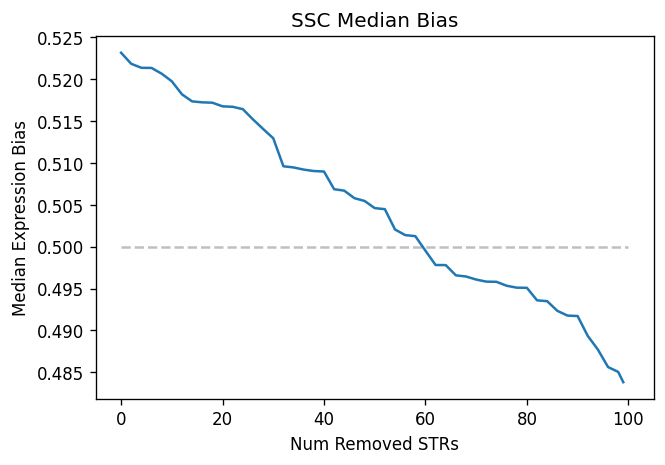

In [6]:
QuntileAVGSelectN(bias_asd_ssc, "SSC", True)

65

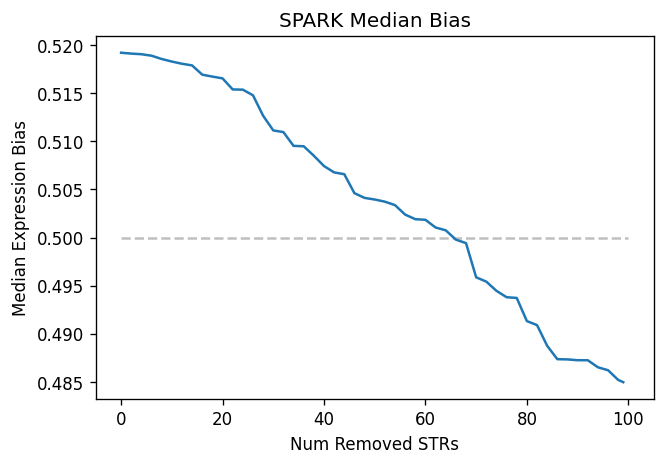

In [7]:
QuntileAVGSelectN(bias_asd_spark, "SPARK", True)

41

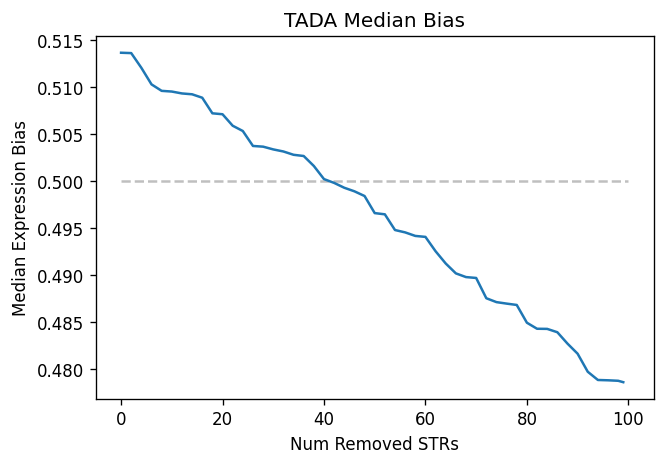

In [8]:
QuntileAVGSelectN(bias_asd_tada, "TADA", True)

In [9]:
bias_asd_ssc = bias_asd_ssc.reset_index()
bias_asd_ssc

,index,STR,Bias,P
0,40,Dentate_gyrus,0.634667,6.801478e-10
1,13,Accessory_olfactory_bulb,0.619356,8.993782e-09
2,75,Lateral_posterior_nucleus_of_the_thalamus,0.613261,3.053071e-08
3,26,Field_CA3,0.609624,1.781061e-07
4,24,Field_CA1,0.606706,5.573882e-07
...,...,...,...,...
208,195,Motor_nucleus_of_trigeminal,0.405575,1.194567e-05
209,152,Nucleus_raphe_magnus,0.402553,2.086802e-05
210,82,Magnocellular_reticular_nucleus,0.398087,1.137402e-06
211,197,Ventral_cochlear_nucleus,0.387731,3.763709e-08


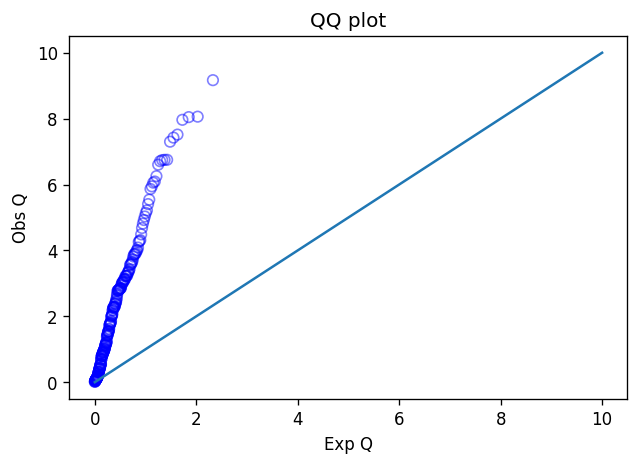

In [10]:
QQplot(bias_asd_ssc["P"].values)

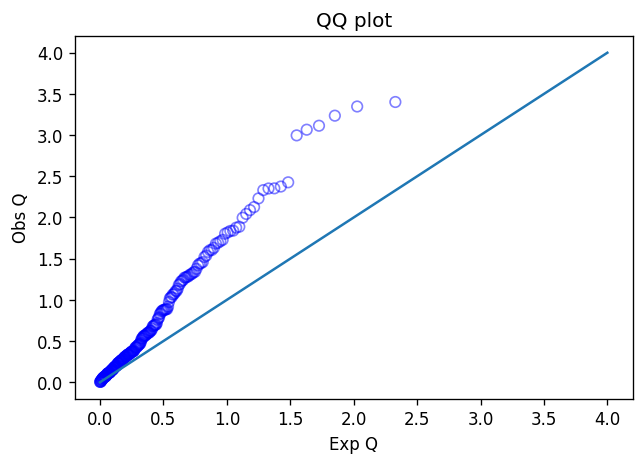

In [11]:
QQplot(bias_asd_sib["P"].values)

In [12]:
brianspan = loadgenelist("../dat/genes/brainspan_express.txt")
rand_dfs = []
median_biases = []
top50_median_biases = []
for i in range(100):
    rand = np.random.choice(brianspan, 231)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    median = np.median(df["Bias"].values)
    top50_median = np.median(df.head(50)["Bias"].values)
    median_biases.append(median)
    top50_median_biases.append(top50_median)
    rand_dfs.append(df)

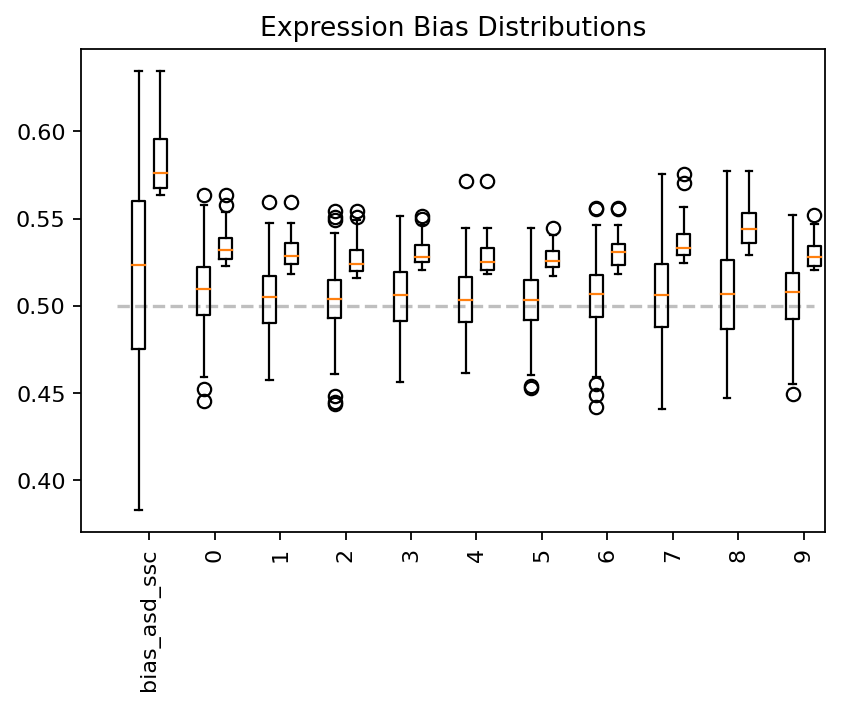

In [13]:
plt.figure(dpi=160)
ax = plt.axes()
num = -1
names = []
sticks = []
for i, (name, bias) in enumerate(zip(["bias_asd_ssc"], 
                                     [bias_asd_ssc])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
for i, (name, bias) in enumerate(zip([str(i) for i in range(10)], rand_dfs[:10])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
ax.set_xticklabels(names)
ax.set_xticks(sticks)
plt.xticks(rotation=90) 
plt.hlines(y=0.5, xmin=1, xmax = num+1, linestyles="dashed", alpha=0.5, color="grey")
#plt.legend()
plt.title("Expression Bias Distributions")
plt.show()

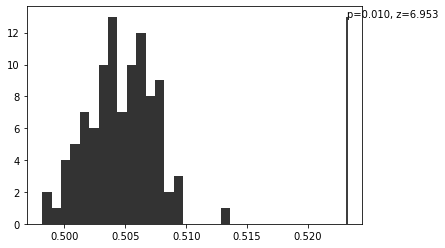

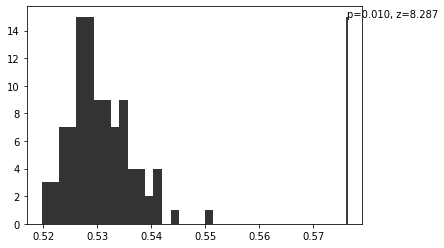

In [14]:
median = np.median(bias_asd_ssc["Bias"].values)
top50_median = np.median(bias_asd_ssc.head(50)["Bias"].values)
PlotPermutationP(median_biases, median)
PlotPermutationP(top50_median_biases, top50_median)

In [15]:
sibling_genes = loadgenelist("../dat/genes/asd.sib.entrez.list")
rand_dfs = []
median_biases = []
top50_median_biases = []
for i in range(100):
    rand = np.random.choice(sibling_genes, 231)
    df = QuantileAVGScoring(ExpZscoreMat, rand)
    median = np.median(df["Bias"].values)
    top50_median = np.median(df.head(50)["Bias"].values)
    median_biases.append(median)
    top50_median_biases.append(top50_median)
    rand_dfs.append(df)

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:271: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  DZzscore = ZscoreMat[STR].loc[np.array(DZgenes)].values


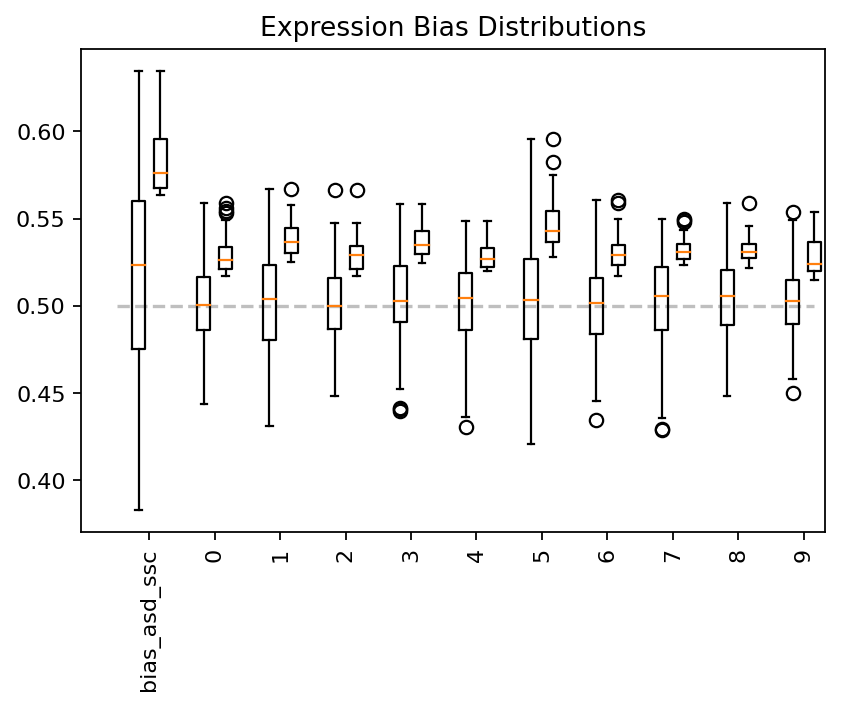

In [16]:
plt.figure(dpi=160)
ax = plt.axes()
num = -1
names = []
sticks = []
for i, (name, bias) in enumerate(zip(["bias_asd_ssc"], 
                                     [bias_asd_ssc])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
for i, (name, bias) in enumerate(zip([str(i) for i in range(10)], rand_dfs[:10])):
    num += 3
    names.append(name)
    All = bias["Bias"].values
    top50 = bias.head(50)["Bias"].values
    bp = plt.boxplot([All, top50], positions = [num, num+1], widths = 0.6)
    sticks.append(num + 0.5)
ax.set_xticklabels(names)
ax.set_xticks(sticks)
plt.xticks(rotation=90) 
plt.hlines(y=0.5, xmin=1, xmax = num+1, linestyles="dashed", alpha=0.5, color="grey")
#plt.legend()
plt.title("Expression Bias Distributions")
plt.show()

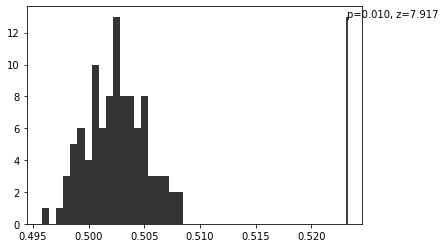

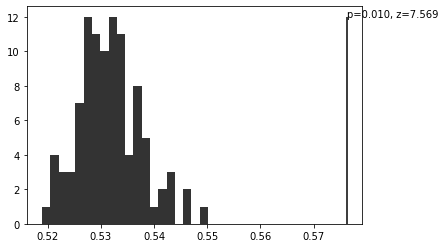

In [17]:
median = np.median(bias_asd_ssc["Bias"].values)
top50_median = np.median(bias_asd_ssc.head(50)["Bias"].values)
PlotPermutationP(median_biases, median)
PlotPermutationP(top50_median_biases, top50_median)

In [18]:
# Quntile AVG NULL
Ns = list(range(50, 1050, 50))
Means, Vars = [], []
for n in Ns:
    rand = QuantileNull(n, 1000, ttest=True)
    mean = np.mean(rand["Bias"].values)
    var = np.var(rand["Bias"].values)
    Means.append(mean)
    Vars.append(var)

Text(0, 0.5, 'Expectation of biases (avg quntiles)')

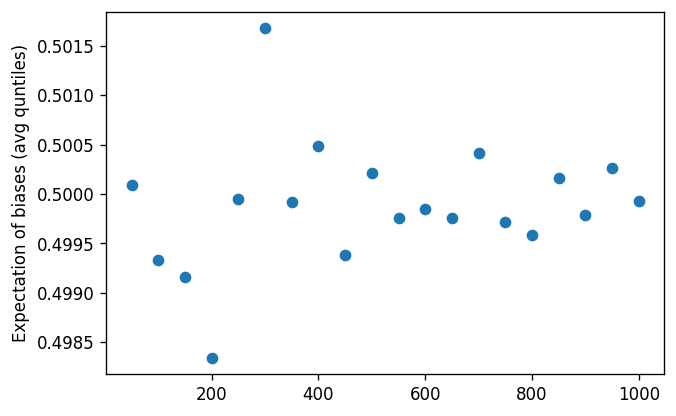

In [24]:
plt.scatter(Ns, Means)
plt.ylabel("Expectation of biases (avg quntiles)")

Text(0.5, 1.0, 'simulated gene set size vs variance of expression bias')

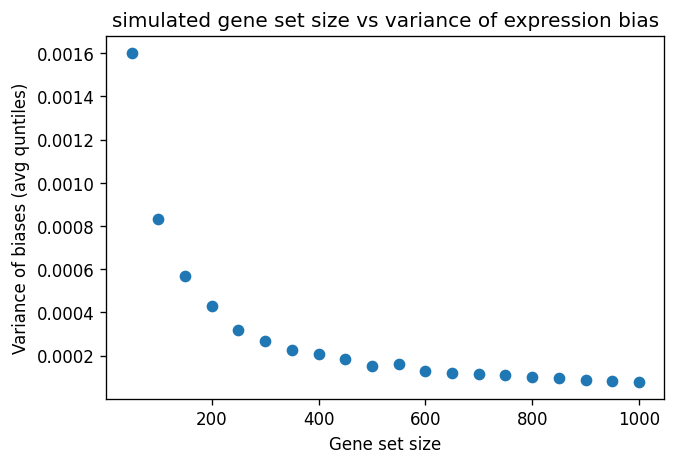

In [21]:
plt.scatter(Ns, Vars)
plt.ylabel("Variance of biases (avg quntiles)")
plt.xlabel("Gene set size")
plt.title("simulated gene set size vs variance of expression bias")

Text(0.5, 1.0, 'simulated gene set size vs variance of expression bias')

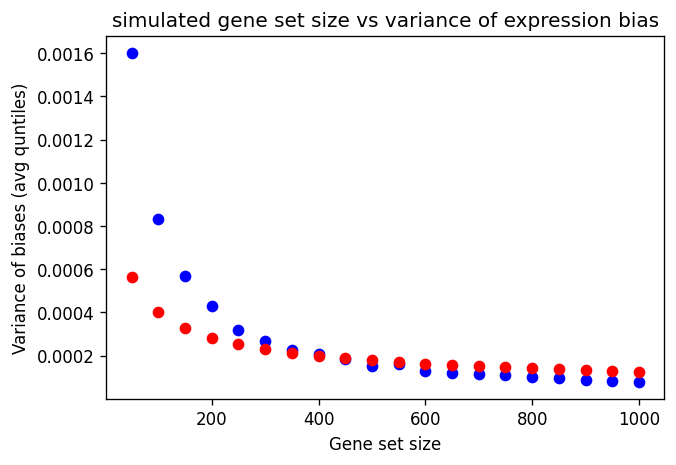

In [58]:
sss = [0.004/math.sqrt(n) for n in Ns]
plt.scatter(Ns, Vars, color="blue")
plt.scatter(Ns, sss, color="red")
plt.ylabel("Variance of biases (avg quntiles)")
plt.xlabel("Gene set size")
plt.title("simulated gene set size vs variance of expression bias")

In [83]:
ssc_q, ssc_z = QuantileAVGShowDist(ExpZscoreMat, asd_ssc)
rand = np.random.choice(brianspan, 231)
rand_q, rand_z = QuantileAVGShowDist(ExpZscoreMat, rand)

In [84]:
print(len(set(ssc_q["STR"].values).intersection(set(ssc_z["STR"].values))))

47


0.576602659439067 0.5421755167034967 0.03442714273557024
1.8162826546406228
Ttest_1sampResult(statistic=4.126493514850589, pvalue=5.1879370899428936e-05)
MannwhitneyuResult(statistic=19140.0, pvalue=0.09468383230943023)
Ttest_indResult(statistic=1.8838635593633648, pvalue=0.05958527713730952)


Text(0.5, 1.0, 'quantiles of 25th str among ssc and rand geneset')

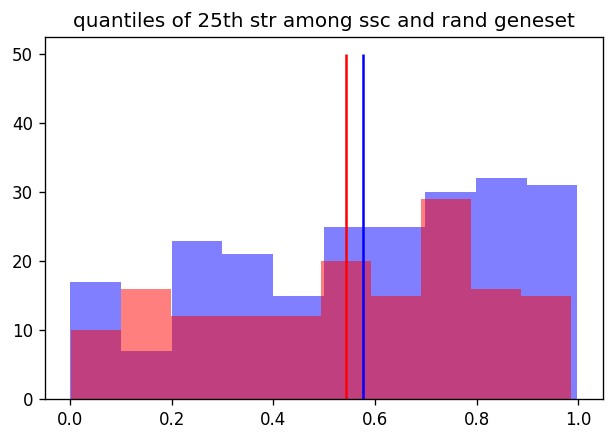

In [154]:
idx = 24
x1 = ssc_q["Quantiles"].values[idx]
x2 = rand_q["Quantiles"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0.5) / (q2-0.5))
print(ttest_1samp(x1, 0.5))
print(mannwhitneyu(x1, x2, alternative='greater'))
print(ttest_ind(x1, x2*1000))
plt.hist(x1, color="blue", alpha=0.5, bins=10)
plt.hist(x2, color="red", alpha=0.5, bins=10)
plt.vlines(x = np.mean(x1), ymin=0, ymax=50, color="blue")
plt.vlines(x = np.mean(x2), ymin=0, ymax=50, color="red")
plt.title("quantiles of %dth str among ssc and rand geneset"%(idx+1))

0.5015471896752036 0.23085422123851457 0.27069296843668905
2.1725710146621653
MannwhitneyuResult(statistic=15251.5, pvalue=0.009749383060385163)


Text(0.5, 1.0, 'zscores of 1th str among ssc and rand geneset')

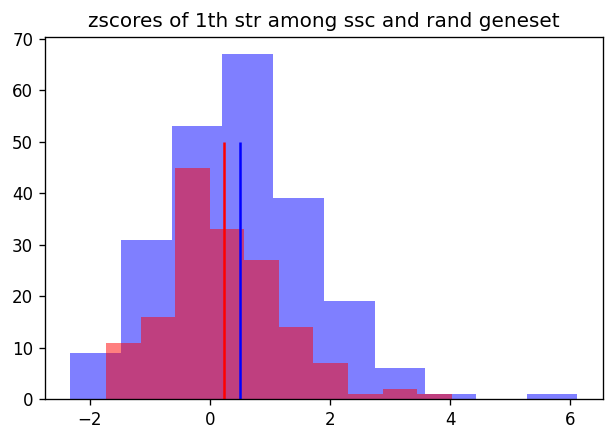

In [137]:
x1 = ssc_z["Zscores"].values[idx]
x2 = rand_z["Zscores"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0) / (q2-0))
print(stats.mannwhitneyu(x1, x2))
plt.hist(x1, color="blue", alpha=0.5, bins=10)
plt.hist(x2, color="red", alpha=0.5, bins=10)
plt.vlines(x = np.mean(x1), ymin=0, ymax=50, color="blue")
plt.vlines(x = np.mean(x2), ymin=0, ymax=50, color="red")
plt.title("zscores of %dth str among ssc and rand geneset"%(idx+1))

In [117]:
sib_q, sib_z = QuantileAVGShowDist(ExpZscoreMat, asd_sib_lgd)
print(len(asd_sib_lgd))
rand = np.random.choice(brianspan, len(asd_sib_lgd))
rand_q, rand_z = QuantileAVGShowDist(ExpZscoreMat, rand)

158


In [128]:
import scipy.stats as stats

0.544680079152941 0.5421755167034967 0.002504562449444303
1.0593842742236435
MannwhitneyuResult(statistic=12261.0, pvalue=0.41437486904569976)


Text(0.5, 1.0, 'quantiles of 25th str among ssc and rand geneset')

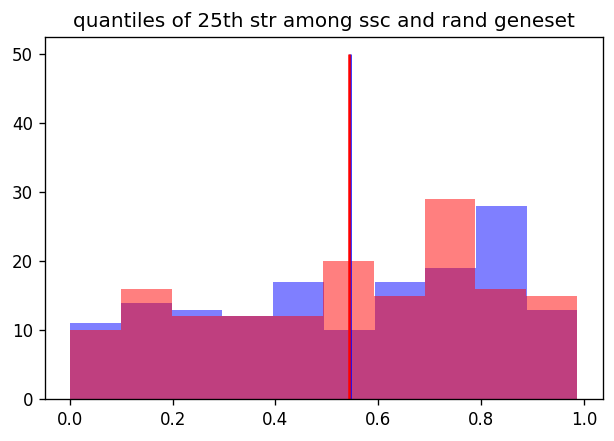

In [157]:
idx = 24
x1 = sib_q["Quantiles"].values[idx]
x2 = rand_q["Quantiles"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0.5) / (q2-0.5))
print(mannwhitneyu(x1, x2, alternative='greater'))
plt.hist(x1, color="blue", alpha=0.5, bins=10)
plt.hist(x2, color="red", alpha=0.5, bins=10)
plt.vlines(x = np.mean(x1), ymin=0, ymax=50, color="blue")
plt.vlines(x = np.mean(x2), ymin=0, ymax=50, color="red")
plt.title("quantiles of %dth str among ssc and rand geneset"%(idx+1))

0.12810001182315126 0.12354203408689407 0.004557977736257185
1.0368941451380937


Text(0.5, 1.0, 'zscores of 25th str among ssc and rand geneset')

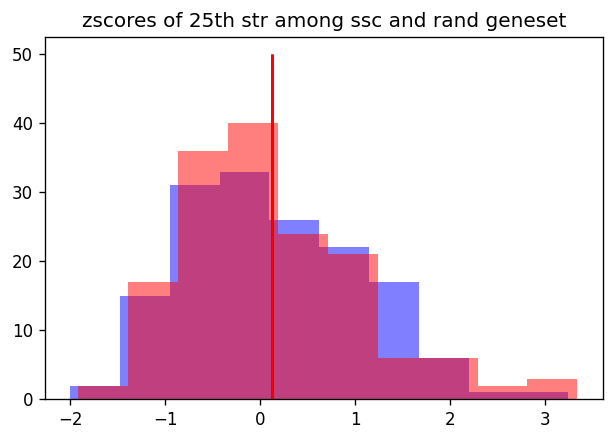

In [156]:
x1 = sib_z["Zscores"].values[idx]
x2 = rand_z["Zscores"].values[idx]
print(np.mean(x1), np.mean(x2), np.mean(x1) - np.mean(x2))
q1 = np.mean(x1); q2 = np.mean(x2)
print((q1-0) / (q2-0))
plt.hist(x1, color="blue", alpha=0.5, bins=10)
plt.hist(x2, color="red", alpha=0.5, bins=10)
plt.vlines(x = np.mean(x1), ymin=0, ymax=50, color="blue")
plt.vlines(x = np.mean(x2), ymin=0, ymax=50, color="red")
plt.title("zscores of %dth str among ssc and rand geneset"%(idx+1))

In [ ]:
jon_rank = pd.read_csv("dat/bias/jon.asd.ssc.zmatch.rank.csv")
jw_rank = pd.read_csv("dat/bias/asd.ssc.zmatch.rank.csv")
jw_old_rank = pd.read_csv("dat/bias/asd.ssc.qavg.rank.tsv")

In [ ]:
jw_rank.head()

In [ ]:
jon_rank.head()

In [ ]:
jon_top50 = jon_rank.head(50)
jw_top50 = jw_rank.head(50)
jw_old_top50 = jw_old_rank.head(50)

In [ ]:
len(set(jon_top50["STRUC"].values).intersection(set(jw_top50["STR"].values)))

In [ ]:
len(set(jw_old_top50["STR"].values).intersection(set(jw_top50["STR"].values)))

In [ ]:
len(set(jw_old_top50["STR"].values).intersection(set(jon_top50["STRUC"].values)))

In [ ]:
plt.hist(jw_rank["Match_Z"].values)